# Exploratory Data Analysis for Credit scoring system



### What is a Credit Scoring System?

A **Credit Scoring System** is a financial tool used to evaluate the creditworthiness of individuals or businesses applying for loans or credit. It is a quantitative assessment of a person’s ability and likelihood to repay debt based on several financial and behavioral factors. The credit score, typically a three-digit number, summarizes a person’s credit history and predicts the risk associated with lending to them.

The system takes into account multiple factors, including:
- **Payment History**: Whether an individual pays their bills on time.
- **Credit Utilization**: The percentage of available credit currently being used.
- **Length of Credit History**: How long the individual has maintained credit accounts.
- **Types of Credit Used**: Credit cards, mortgages, auto loans, etc.
- **Recent Credit Inquiries**: Whether the individual has applied for new credit recently.

Credit scoring models use these factors to generate a score, which lenders use to make decisions about whether to approve or deny credit applications, as well as to determine loan terms (interest rates, loan limits, etc.).

## Standard package imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:


# Load the dataset from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
column_names = ['Existing Checking Account', 'Duration', 'Credit History', 'Purpose',
                'Credit Amount', 'Savings Account', 'Employment Since', 'Installment Rate',
                'Personal Status and Sex', 'Other Debtors', 'Residence Since',
                'Property', 'Age', 'Other Installment Plans', 'Housing', 'Existing Credits',
                'Job', 'Liable Persons', 'Telephone', 'Foreign Worker', 'Target']
df = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Display first few rows
print('\nSample records of the dataset\n')
print(df.head())

# Check the structure of the dataset
print('\nStructure of the dataset\n')
print(df.info())

# Check for missing values
print('\nMissing value count\n')
print(df.isnull().sum())

# Summary statistics for numeric features
print('\nStats about the numerical features\n')
print(df.describe())

# Unique values in categorical columns
print('\nUnique value count of Categorical columns\n')
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col} has {df[col].nunique()} unique values')



Sample records of the dataset

  Existing Checking Account  Duration Credit History Purpose  Credit Amount  \
0                       A11         6            A34     A43           1169   
1                       A12        48            A32     A43           5951   
2                       A14        12            A34     A46           2096   
3                       A11        42            A32     A42           7882   
4                       A11        24            A33     A40           4870   

  Savings Account Employment Since  Installment Rate Personal Status and Sex  \
0             A65              A75                 4                     A93   
1             A61              A73                 2                     A92   
2             A61              A74                 2                     A93   
3             A61              A74                 2                     A93   
4             A61              A73                 3                     A93   

  Other Debt

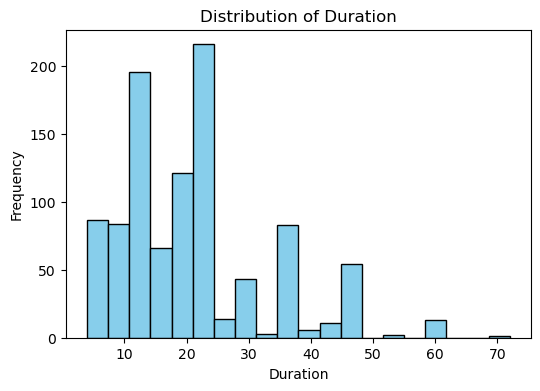

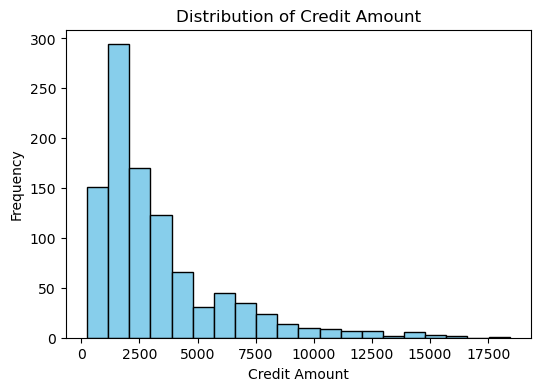

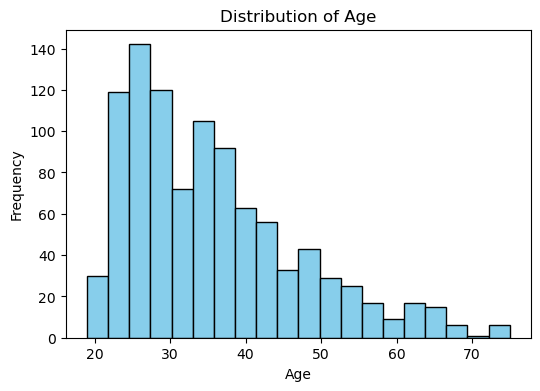

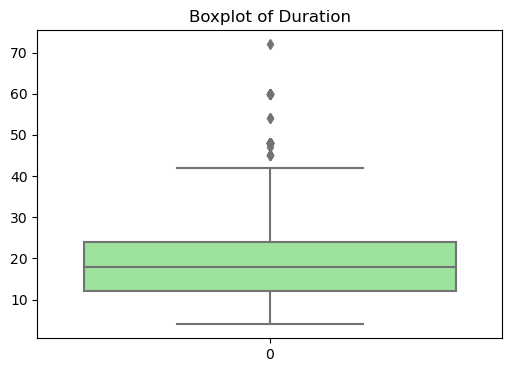

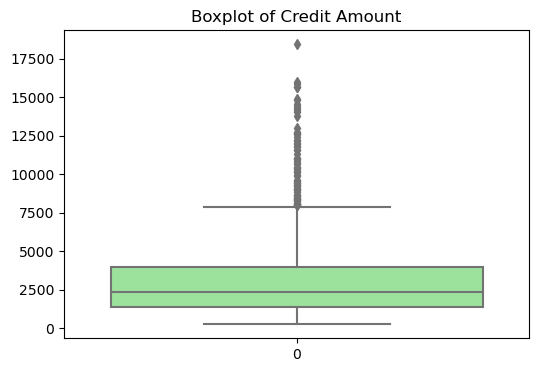

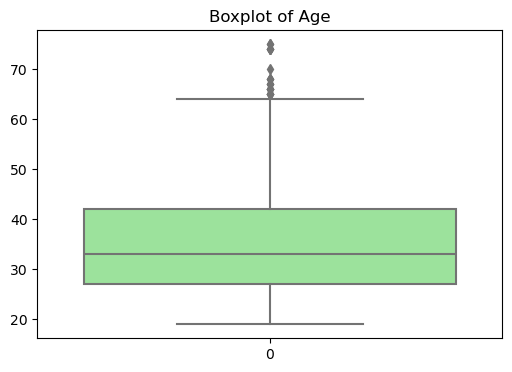

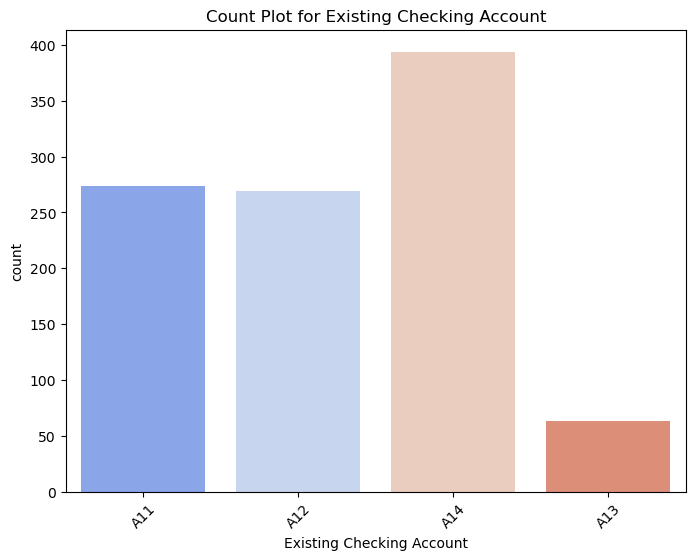

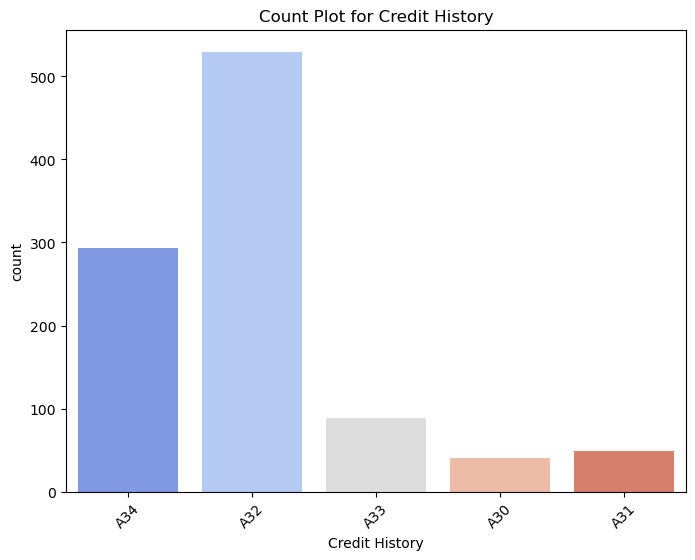

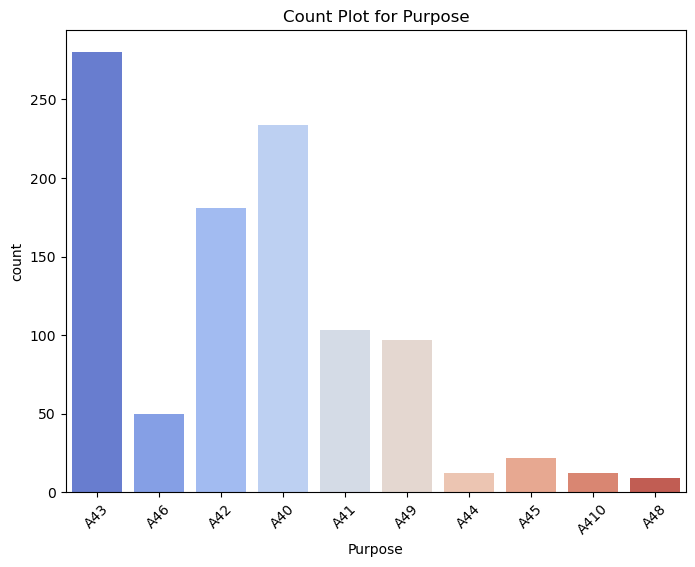

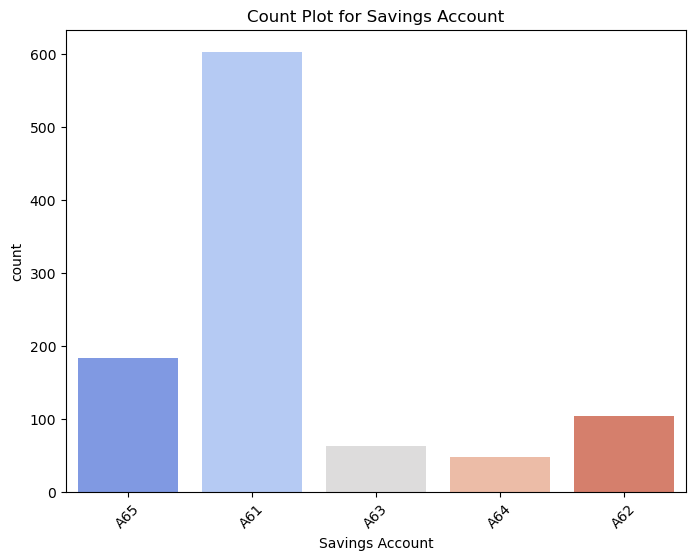

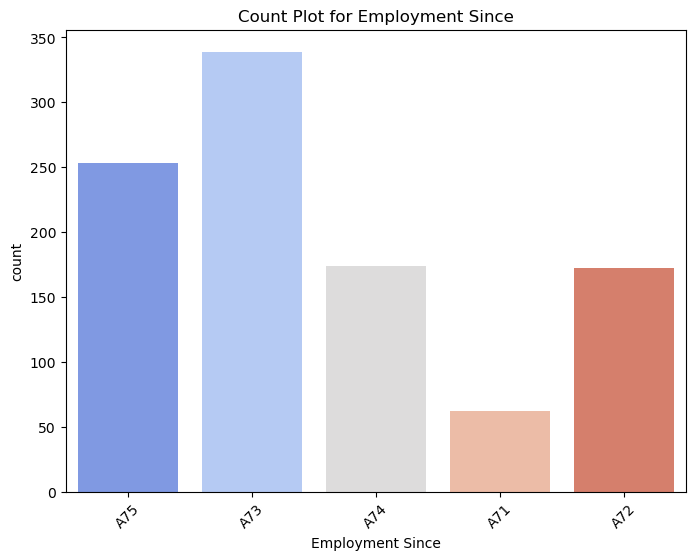

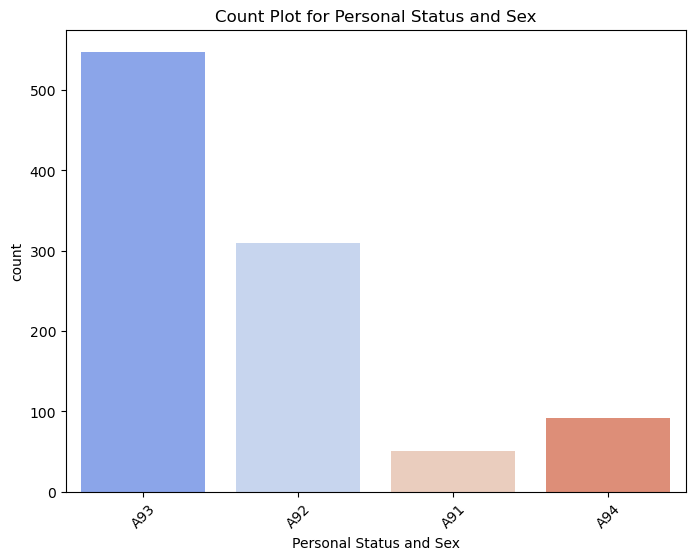

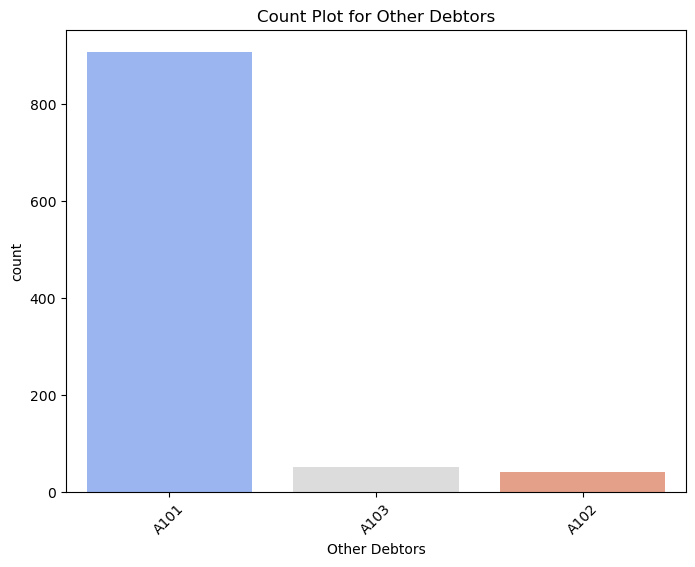

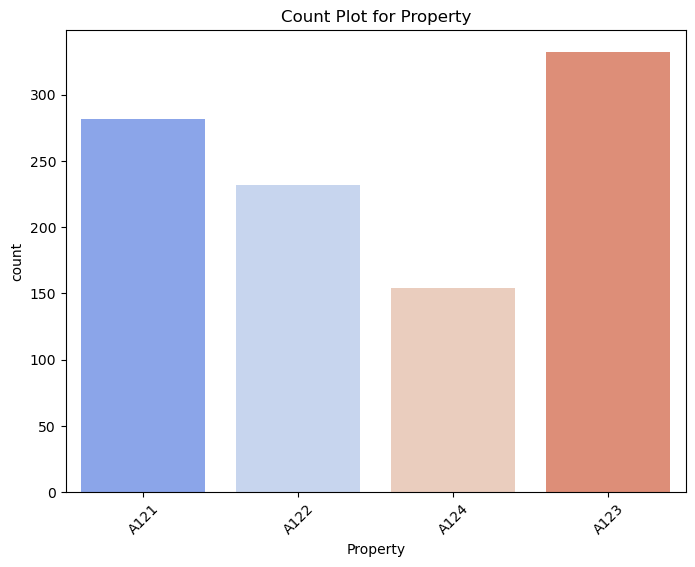

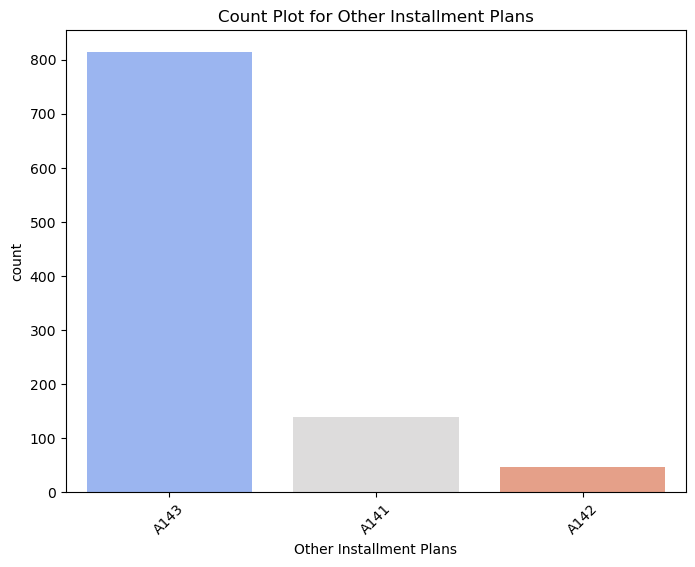

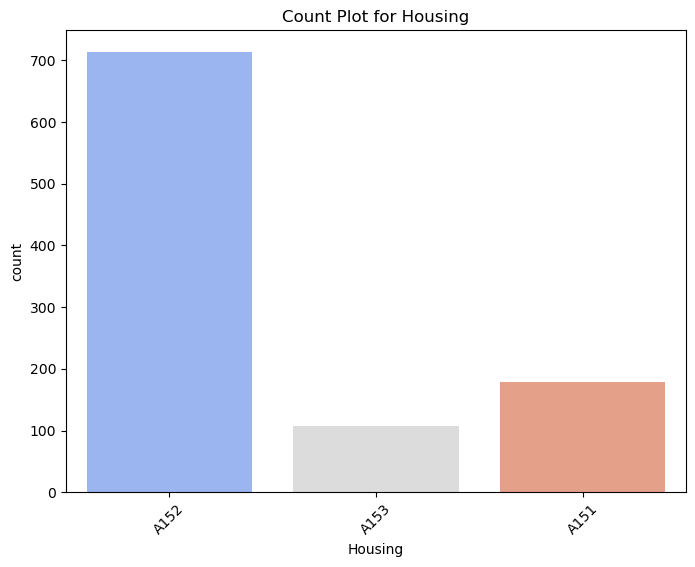

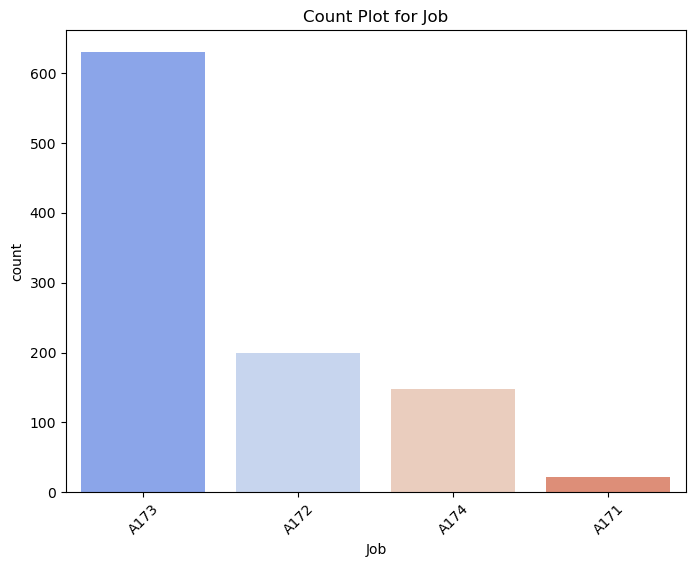

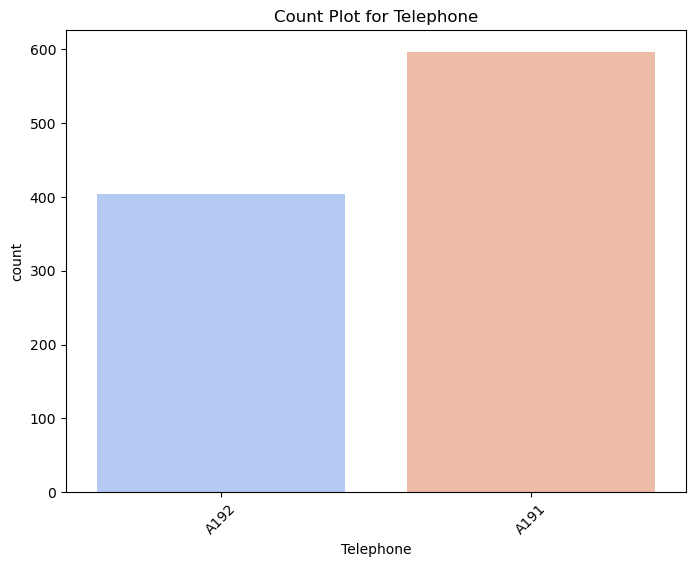

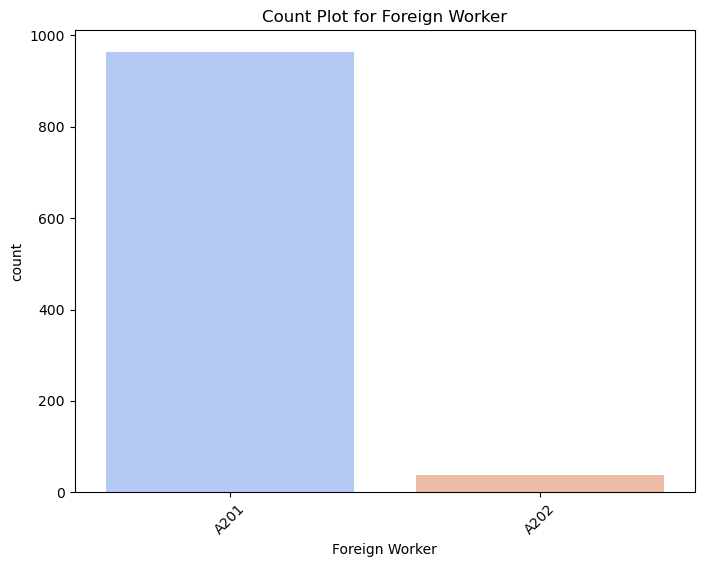

In [ ]:
# Plotting histograms for numeric features
numeric_columns = ['Duration', 'Credit Amount', 'Age']

for col in numeric_columns:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    fname = col.replace(" ","")
    plt.savefig(f'/Users/rajesh/Desktop/BLMLAI/credit_scoring_system/images/1_Distribution_of_{fname}.png',dpi=None)
    plt.show()

# Boxplots for numeric features to identify outliers
for col in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    fname = col.replace(" ","")
    plt.savefig(f'/Users/rajesh/Desktop/BLMLAI/credit_scoring_system/images/2_box_plot_of_{fname}.png',dpi=None)
    plt.show()

# Bar plots for categorical variables
categorical_columns = ['Existing Checking Account', 'Credit History', 'Purpose', 'Savings Account',
                       'Employment Since', 'Personal Status and Sex', 'Other Debtors', 'Property',
                       'Other Installment Plans', 'Housing', 'Job', 'Telephone', 'Foreign Worker']

for col in categorical_columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=df, palette='coolwarm')
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    fname = col.replace(" ","")
    plt.savefig(f'/Users/rajesh/Desktop/BLMLAI/credit_scoring_system/images/3_count_plot_of_{fname}.png',dpi=None)
    plt.show()


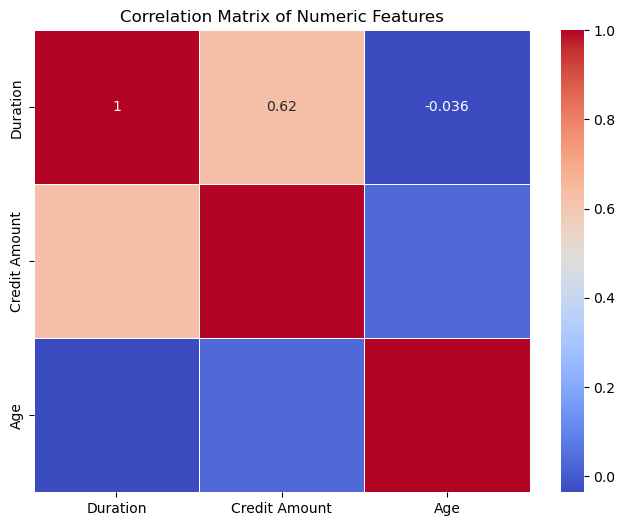

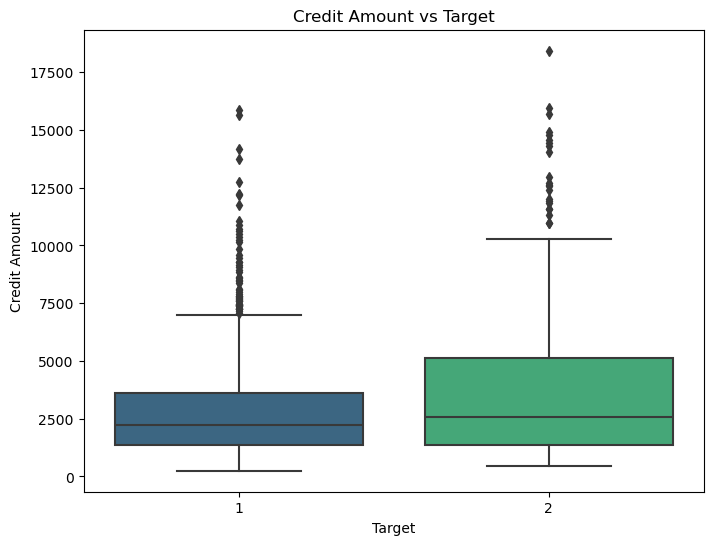

In [ ]:
# Correlation heatmap for numeric features
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.savefig(f'/Users/rajesh/Desktop/BLMLAI/credit_scoring_system/images/4_heatmap_numeric_feature.png',dpi=None)
plt.show()

# Boxplot of Credit Amount by Target (to check if creditworthiness affects credit amount)
plt.figure(figsize=(8,6))
sns.boxplot(x='Target', y='Credit Amount', data=df, palette='viridis')
plt.title('Credit Amount vs Target')
plt.savefig(f'/Users/rajesh/Desktop/BLMLAI/credit_scoring_system/images/5_boxplot_credit_target.png',dpi=None)
plt.show()




/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


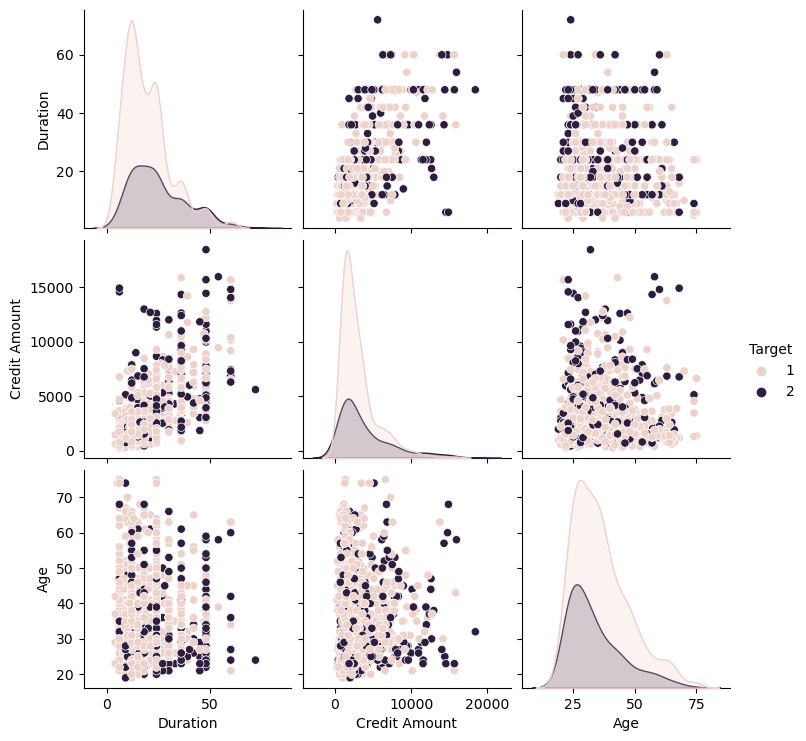

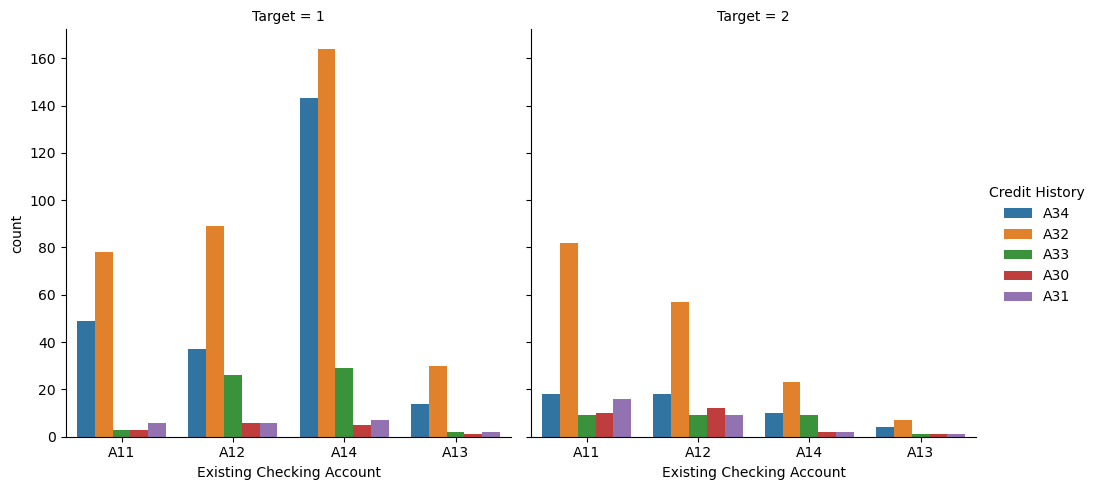

In [ ]:
# Pairplot for selected numeric features to observe their relationship
sns.pairplot(df, hue='Target', vars=['Duration', 'Credit Amount', 'Age'])
plt.savefig(f'/Users/rajesh/Desktop/BLMLAI/credit_scoring_system/images/6_pairplot_numeric_target.png',dpi=None)
plt.show()

# Checking the interaction between two categorical variables with respect to the target variable
sns.catplot(x="Existing Checking Account", hue="Credit History", col="Target", data=df, kind="count", height=5, aspect=1)
plt.savefig(f'/Users/rajesh/Desktop/BLMLAI/credit_scoring_system/images/7_pairplot_categorical_target.png',dpi=None)
plt.show()
